<a href="https://colab.research.google.com/github/Mbigdeli2003/Fault-Detection/blob/main/FAULT_PCA_Fault_Detection_T%5E2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deimenson Reduction HW2 PCA & T^2 & Logistic Regression on TEP

## Importing Libraries

In [ ]:
from google.colab import drive
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_digits
from sklearn.decomposition import FastICA
from sklearn.cross_decomposition import PLSRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

## Importing TEP

In [ ]:
##Train
Fault_Free_Trian = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Normal 00 train (480x52).xlsx") #replace address from drive
Faulty_train = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Fault 1-20  train (20x480x52).xlsx") #replace address from drive

##Test

Fault_Free_Test = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Normal 00 test (960x52).xlsx") #replace address from drive
Faulty_Test = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Fault 1-20  test  (20x960x52).xlsx") #replace address from drive

In [ ]:
# Applying new viarible for uniformung matrix without head
Names = ['Unnamed: 0', 'faultNumber', 'simulationRun', 'sample', 'xmeas_1',
       'xmeas_2', 'xmeas_3', 'xmeas_4', 'xmeas_5', 'xmeas_6', 'xmeas_7',
       'xmeas_8', 'xmeas_9', 'xmeas_10', 'xmeas_11', 'xmeas_12', 'xmeas_13',
       'xmeas_14', 'xmeas_15', 'xmeas_16', 'xmeas_17', 'xmeas_18', 'xmeas_19',
       'xmeas_20', 'xmeas_21', 'xmeas_22', 'xmeas_23', 'xmeas_24', 'xmeas_25',
       'xmeas_26', 'xmeas_27', 'xmeas_28', 'xmeas_29', 'xmeas_30', 'xmeas_31',
       'xmeas_32', 'xmeas_33', 'xmeas_34', 'xmeas_35', 'xmeas_36', 'xmeas_37',
       'xmeas_38', 'xmeas_39', 'xmeas_40', 'xmeas_41', 'xmv_1', 'xmv_2',
       'xmv_3', 'xmv_4', 'xmv_5', 'xmv_6', 'xmv_7', 'xmv_8', 'xmv_9', 'xmv_10',
       'xmv_11']
Faulty_train = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Fault/TEP Data/Fault 1-20  train (20x480x52).xlsx", header=None, names=Names)

### Data Scalling

In [ ]:
##Scaling Data Faulty Train
our_faulty_classes= Faulty_train[(Faulty_train.faultNumber==1)|
                                 (Faulty_train.faultNumber==3 )|
                                 (Faulty_train.faultNumber==5 )|
                                 (Faulty_train.faultNumber==7 )|
                                 (Faulty_train.faultNumber==9 )|
                                 (Faulty_train.faultNumber==11 )|
                                 (Faulty_train.faultNumber==13)|
                                 (Faulty_train.faultNumber==15 )|
                                 (Faulty_train.faultNumber==17)|
                                 (Faulty_train.faultNumber==19)].iloc[:,4:]
our_faulty_classes.drop(['xmeas_2','xmeas_6','xmeas_8','xmeas_12','xmeas_14','xmeas_15','xmeas_17','xmeas_18','xmeas_26','xmeas_27',
'xmeas_28','xmeas_37','xmv_1','xmv_2','xmv_3','xmv_4','xmv_10','xmv_11'],axis=1,inplace=True)


ff = our_faulty_classes
df_max_scaled = ff.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ff)
tr_s = scaler.transform(ff)

In [ ]:
Faulty_Test_Class=Faulty_Test[(Faulty_Test.faultNumber==1)|
                                 (Faulty_Test.faultNumber==3 )|
                                 (Faulty_Test.faultNumber==5 )|
                                 (Faulty_Test.faultNumber==7 )|
                                 (Faulty_Test.faultNumber==9 )|
                                 (Faulty_Test.faultNumber==11 )|
                                 (Faulty_Test.faultNumber==13)|
                                 (Faulty_Test.faultNumber==15 )|
                                 (Faulty_Test.faultNumber==17)|
                                 (Faulty_Test.faultNumber==19)].iloc[:,4:]
Faulty_Test_Class.drop(['xmeas_2','xmeas_6','xmeas_8','xmeas_12','xmeas_14','xmeas_15','xmeas_17','xmeas_18','xmeas_26','xmeas_27',
'xmeas_28','xmeas_37','xmv_1','xmv_2','xmv_3','xmv_4','xmv_10','xmv_11'],axis=1,inplace=True)


ff_1 = Faulty_Test_Class
df_max_scaled = ff_1.copy()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(ff_1)
tr_s_T = scaler.transform(ff_1)

## PCA

### PCA Algorithm

In [ ]:
##PCA Function
n_components =15
pca = PCA(n_components=n_components)
pca
##PCA Data Shape Transformed
Xt = pca.fit_transform(tr_s)
print('Original Data Shape :',tr_s.shape)
print('PC Data Shape:',Xt.shape)
print('PCA Singular Values:',pca.singular_values_)


Original Data Shape : (5000, 34)
PC Data Shape: (5000, 15)
PCA Singular Values: [219.29752264 162.94624959 144.37225967  91.7261882   81.36350609
  79.01862     74.40663815  72.85385526  71.58505942  68.32335149
  66.37445379  63.65817647  59.26796106  58.30577278  54.37845075]


### PCA SVD and Varinace Plotting

In [ ]:
"""
SVDs print and plot
"""
v=pca.singular_values_
plt.plot(np.sort(v)[::-1],'o-',linewidth=2)
plt.grid()
font1 = {'color':'g','size':15}
plt.title('Singular Values of Faulty Data',fontdict = font1)
print('Singular Values:',pca.singular_values_)
"""
Variances and plot
"""


In [ ]:
"""
Plotting Variance Values
"""
Va=pca.explained_variance_ratio_
plt.plot(np.sort(Va)[::-1],'o-',linewidth=2)
plt.grid()
font1 = {'color':'g','size':15}
plt.title('Variance Values of Faulty Data',fontdict = font1)
print('Vairiance Ratio:',pca.explained_variance_ratio_)


Vairiance Ratio for 15: 0.916044847089791
Vairiance Ratio for 10: 0.808237777669085
Vairiance Ratio f0r 4: 0.5616837238446322
Vairiance Ratio f0r 3: 0.4390757864120668
Vairiance Ratio:for 2: 0.28289060844342256


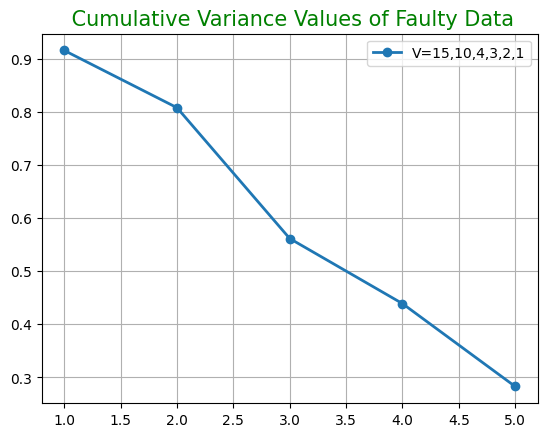

In [ ]:
"""
Plotting  cumulative Variance Values
"""
Va_1=np.sum(pca.explained_variance_ratio_[0:15])
Va_2=np.sum(pca.explained_variance_ratio_[0:10])
Va_3=np.sum(pca.explained_variance_ratio_[0:3])
Va_4=np.sum(pca.explained_variance_ratio_[0:2])
Va_5=np.sum(pca.explained_variance_ratio_[0:1])
print('Vairiance Ratio for 15:', Va_1)
print('Vairiance Ratio for 10:',Va_2)
print('Vairiance Ratio f0r 4:',Va_3)
print('Vairiance Ratio f0r 3:',Va_4)
print('Vairiance Ratio:for 2:',Va_5)
font1 = {'color':'g','size':15}
plt.plot(np.arange(1,6,1),[Va_1, Va_2, Va_3,Va_4,Va_5],'o-',linewidth=2)
plt.title(' Cumulative Variance Values of Faulty Data',fontdict = font1)
plt.legend(['V=15,10,4,3,2,1'])
plt.grid()


In [ ]:
Faulty_Test_Class_2=Faulty_Test[(Faulty_Test.faultNumber==1)|
                                 (Faulty_Test.faultNumber==3 )|
                                 (Faulty_Test.faultNumber==5 )|
                                 (Faulty_Test.faultNumber==7 )|
                                 (Faulty_Test.faultNumber==9 )|
                                 (Faulty_Test.faultNumber==11 )|
                                 (Faulty_Test.faultNumber==13)|
                                 (Faulty_Test.faultNumber==15 )|
                                 (Faulty_Test.faultNumber==17)|
                                 (Faulty_Test.faultNumber==19)].iloc[:,:]

## Fault Detecting By Mean and STD after applying PCA

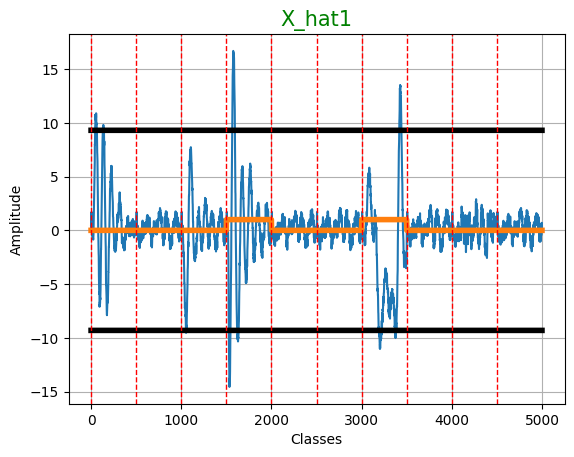

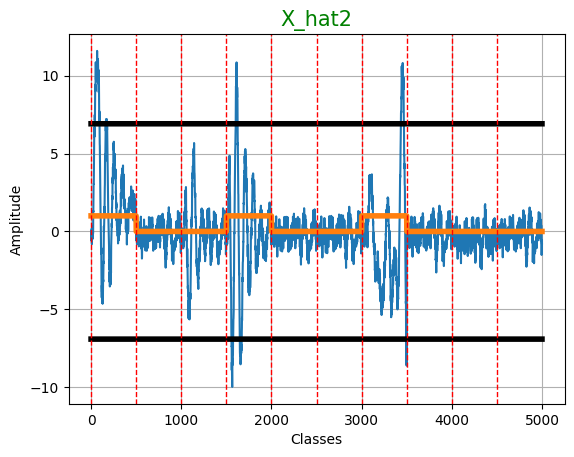

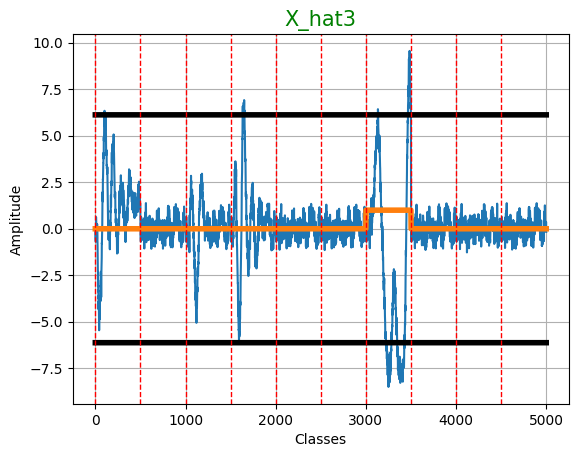

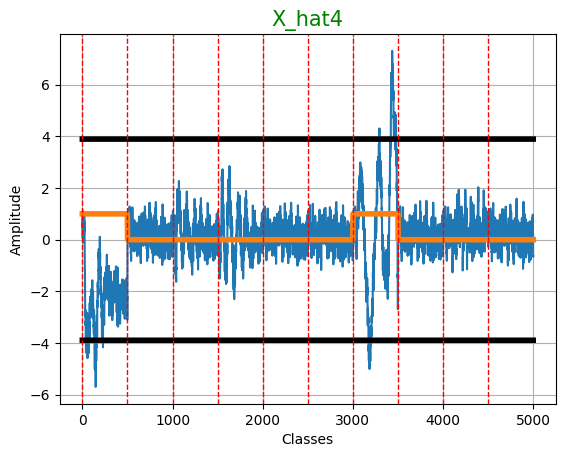

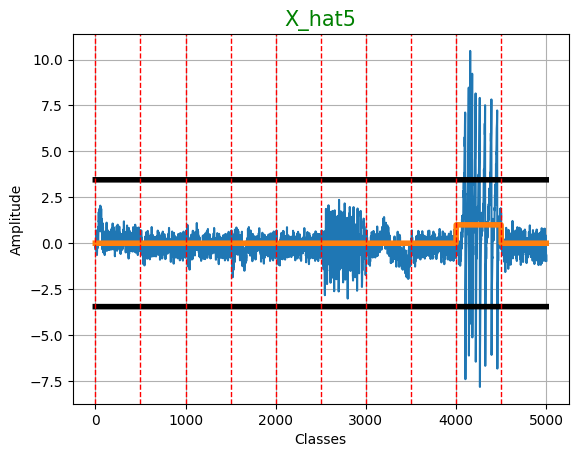

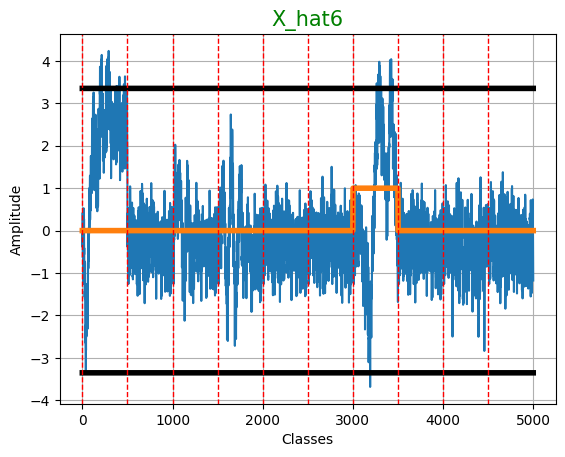

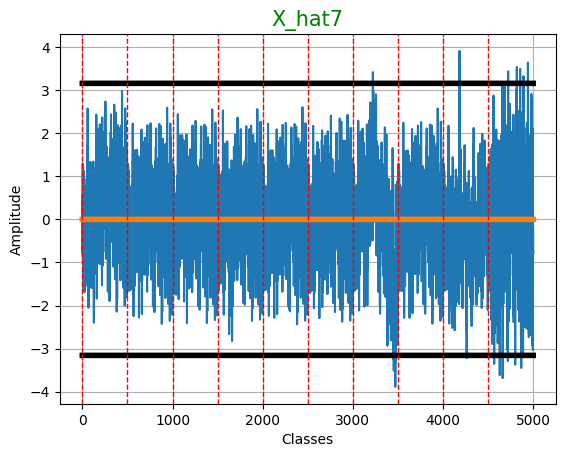

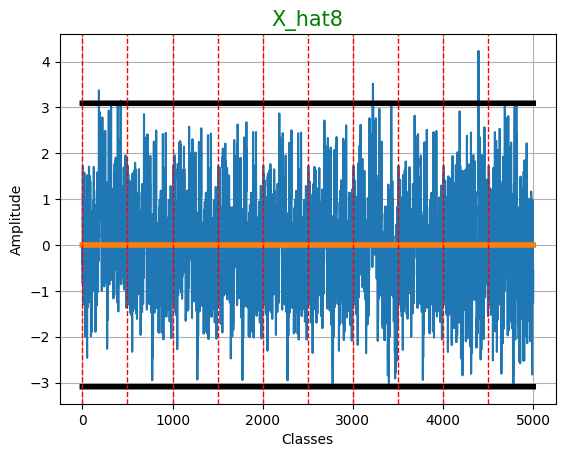

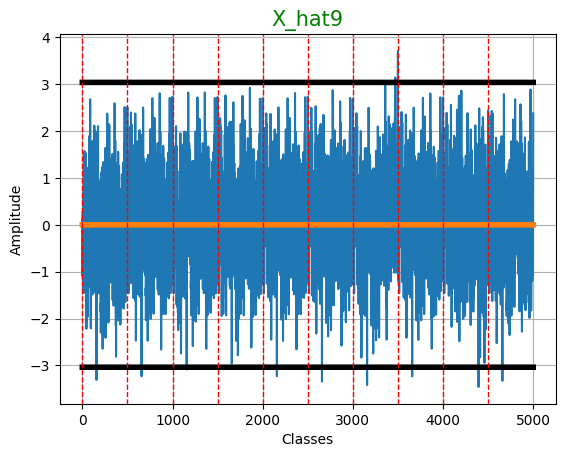

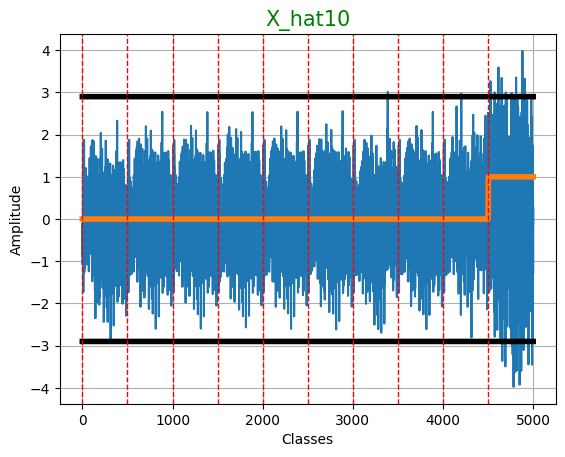

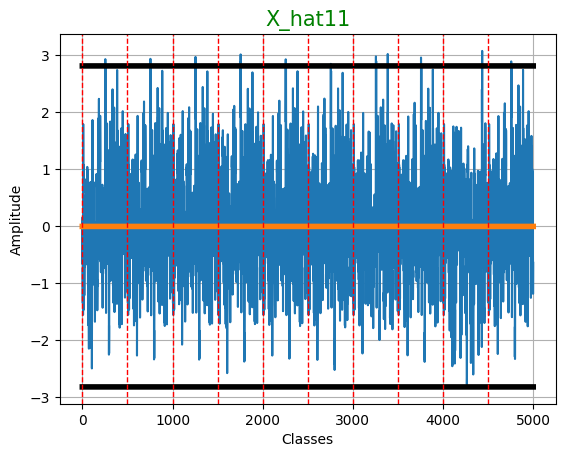

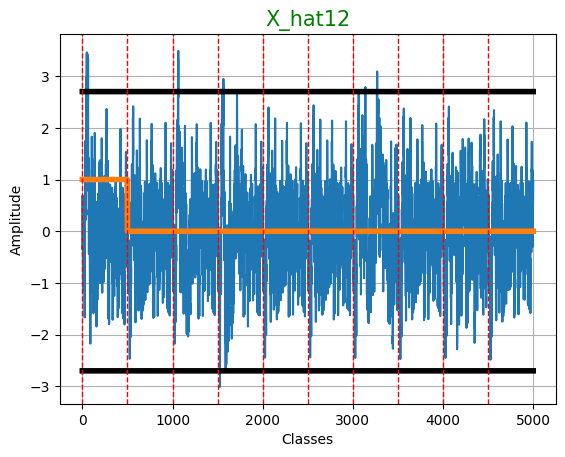

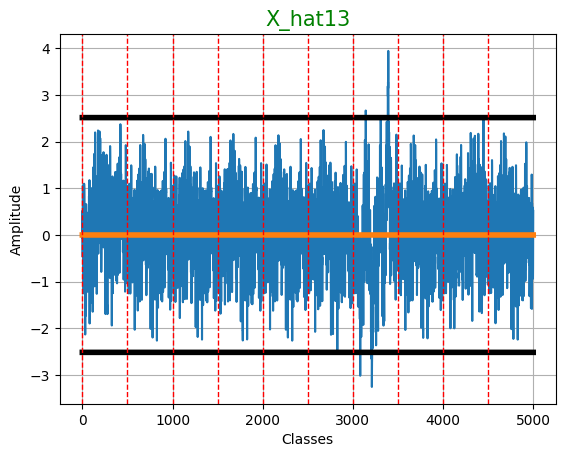

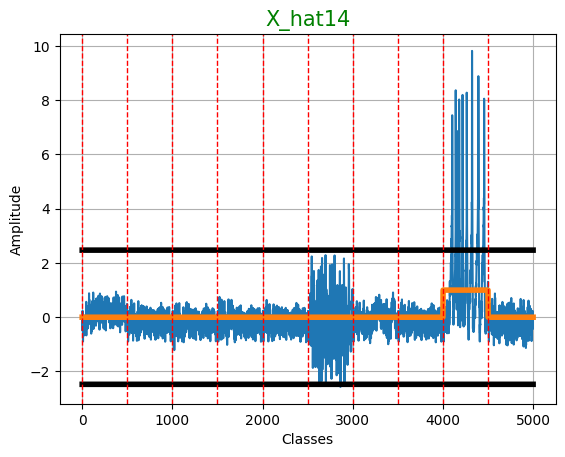

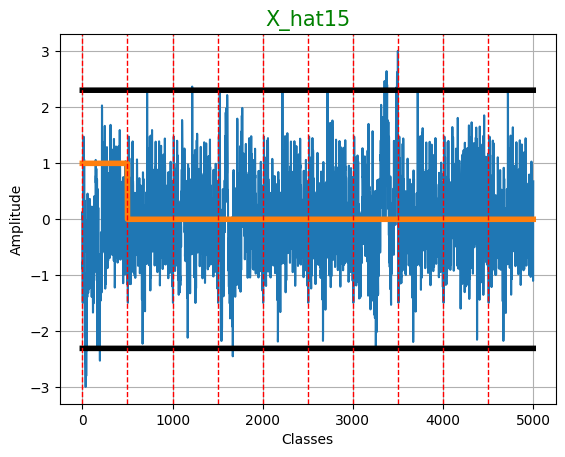

In [ ]:
	"""
	Plotting new Varibales through Classes for 15 and Fault Detecting with Std and Mean
	"""
	jj=0
Lable=np.zeros((5000,15))
	for i in range(len(Xt[0,:])):
	    plt.figure()
	    plt.plot(Xt[:,i])
	    plt.plot((np.mean(Xt[:,i])+3*np.std(Xt[:,i]))*np.ones(5000),color='black', linewidth='4')
	    plt.plot((np.mean(Xt[:,i])-3*np.std(Xt[:,i]))*np.ones(5000),color='black',linewidth='4')
	    for k in range(0,5000,1):
	        if ((Xt[k,i]))>(np.mean(Xt[:,i])+3*np.std(Xt[:,i])) or (Xt[k,i])<(np.mean(Xt[:,i])-3*np.std(Xt[:,i])):
	            jj=jj+1
	        if jj>50:
	                Lable[(k//500)*500:((k//500)+1)*500,i]=1
	                jj=0
	    plt.plot(np.arange(0,5000,1),Lable[:,i], linewidth='4')
	    for j in range(0,5000,500):
	        plt.axvline(x =j, ymin=0, ymax=1000, linewidth = 1, linestyle ="--", color ='red')
	    plt.xlabel('Classes')
	    plt.ylabel('Amplitude')
	    plt.grid()
	    font1 = {'color':'g','size':15}
	    plt.title("X_hat{}".format(i+1),fontdict = font1)
	plt.show()


array([[0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## T^2 for Fault Detectin by PCA

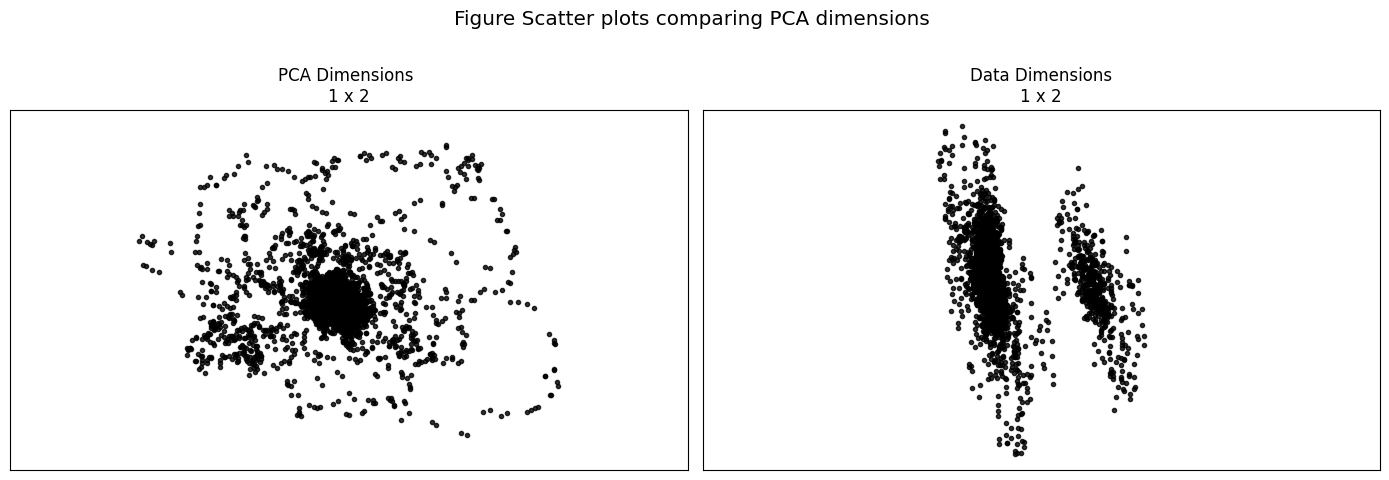

In [ ]:
# Setting plotting parameters
alpha_val =0.8

# Plot
n_plots = 2
f, axes = plt.subplots(1, n_plots, figsize=(14,5))
st=f.suptitle("Figure Scatter plots comparing PCA dimensions ", fontsize="x-large")

# plot data
axes[0].scatter(Xt[:, 0], Xt[:, 1],
                alpha=alpha_val, marker='.', color = 'k')
axes[1].scatter(tr_s[:, 0], tr_s[:, 1],
                alpha=alpha_val, marker='.', color = 'k')
#axes[2].scatter(Xt[:, 4], Xt[:, 5],
             #   alpha=alpha_val, marker='.', color = 'k')
#axes[3].scatter(Xt[:, 6], Xt[:, 7],
              #  alpha=alpha_val, marker='.', color = 'k')
#axes[4].scatter(Xt[:, 8], Xt[:, 9],
               # alpha=alpha_val, marker='.', color = 'k')

axes[0].set_title('PCA Dimensions \n1 x 2')
axes[1].set_title('Data Dimensions\n1 x 2')
#axes[2].set_title('Data Dimensions\n5 x 6')
#axes[3].set_title('Data Dimensionss\n7 x 8')
#axes[4].set_title('Data Dimensions\n9 x 10')

# modifications that are common to all plots
for i in range(n_plots):
    axes[i].axis('equal')
    axes[i].set_xticks([])
    axes[i].set_yticks([])

f.tight_layout()
st.set_y(0.95)
f.subplots_adjust(top=0.75)

### Calculati and Plotting T^2 for varibales and comapring

<ipython-input-16-5584f2ffb420>:14: RuntimeWarning: divide by zero encountered in divide
  Z_1=np.dot(np.dot(1/np.sqrt(Λ),(V)),Xt[:,0])
<ipython-input-16-5584f2ffb420>:14: RuntimeWarning: invalid value encountered in divide
  Z_1=np.dot(np.dot(1/np.sqrt(Λ),(V)),Xt[:,0])
<ipython-input-16-5584f2ffb420>:15: RuntimeWarning: divide by zero encountered in divide
  Z_2=np.dot(np.dot(1/np.sqrt(Λ),(V)),Xt[:,1])
<ipython-input-16-5584f2ffb420>:15: RuntimeWarning: invalid value encountered in divide
  Z_2=np.dot(np.dot(1/np.sqrt(Λ),(V)),Xt[:,1])
/usr/local/lib/python3.10/dist-packages/matplotlib/collections.py:192: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


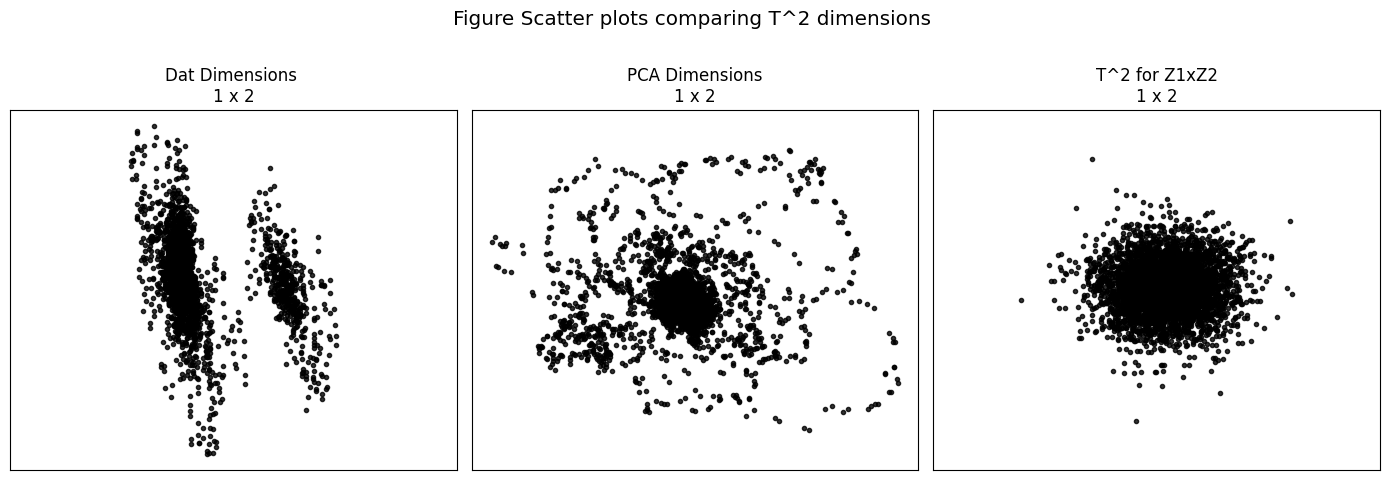

In [ ]:
#T^2
#Calcuating T for m=2 Data
import math
m=2
n=5000
X=np.transpose(np.vstack((Xt[:,0],Xt[:,1])))
S=(1/(n-1))*np.dot(X,(np.transpose(X)))
eigenvalues, eigenvectors = np.linalg.eig(S)
V = eigenvectors
Λ = np.diag(eigenvalues)
Λ_inv = np.linalg.inv(Λ)
Y_1=np.dot((V),Xt[:,0])
Y_2=np.dot((V),Xt[:,1])
Z_1=np.dot(np.dot(1/np.sqrt(Λ),(V)),Xt[:,0])
Z_2=np.dot(np.dot(1/np.sqrt(Λ),(V)),Xt[:,1])
alpha_val = 0.8
Y=np.transpose(np.vstack((Y_1,Y_2)))
# Plot
n_plots = 3
f, axes = plt.subplots(1, n_plots, figsize=(14,5))
st=f.suptitle("Figure Scatter plots comparing T^2 dimensions ", fontsize="x-large")

# plot data
axes[0].scatter(tr_s[:, 0], tr_s[:, 1],
                alpha=alpha_val, marker='.', color = 'k')
axes[1].scatter(Xt[:, 0], Xt[:, 1],
                alpha=alpha_val, marker='.', color = 'k')
axes[2].scatter(Y[:, 0], Y[:, 1],
                alpha=alpha_val, marker='.', color = 'k')
#axes[3].scatter(Z_1, Z_2),
              #  alpha=alpha_val, marker='.', color = 'k')
#axes[4].scatter(Xt[:, 8], Xt[:, 9],
               # alpha=alpha_val, marker='.', color = 'k')

axes[0].set_title('Dat Dimensions \n1 x 2')
axes[1].set_title('PCA Dimensions\n1 x 2')
axes[2].set_title('T^2 for Z1xZ2\n1 x 2')
#axes[4].set_title('Data Dimensions\n9 x 10')

# modifications that are common to all plots
for i in range(n_plots):
    axes[i].axis('equal')
    axes[i].set_xticks([])
    axes[i].set_yticks([])

f.tight_layout()
st.set_y(0.95)
f.subplots_adjust(top=0.75)


### T^2 With F function

In [ ]:
m=3
n=5000
T=np.zeros((16,6))
Deg_f=np.zeros((8,1))
#Finding T from F_alpha Function table for inf
F_alpha=np.array([1.645, 1.960, 2.326, 2.576, 3.090, 3.291])
T=m*(n-1)*(n+1)/((n)*(n-m))*1.64

T

3.281312393757503

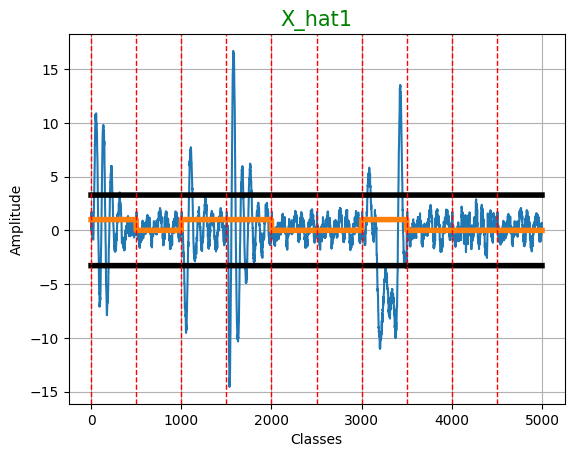

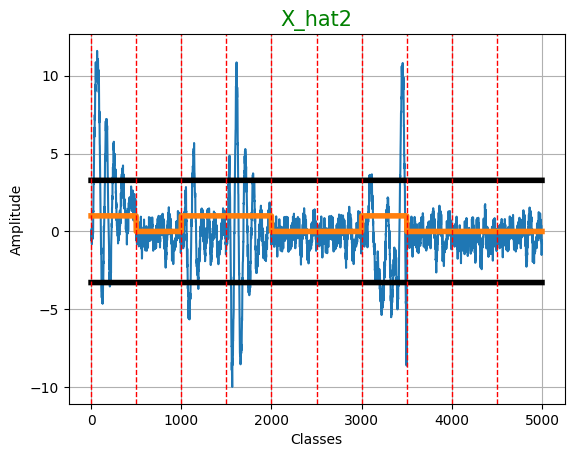

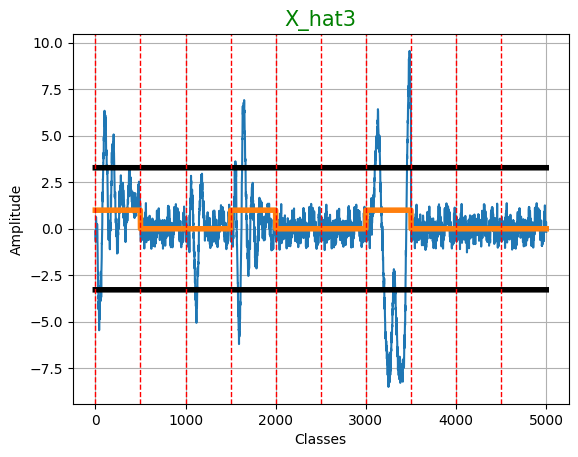

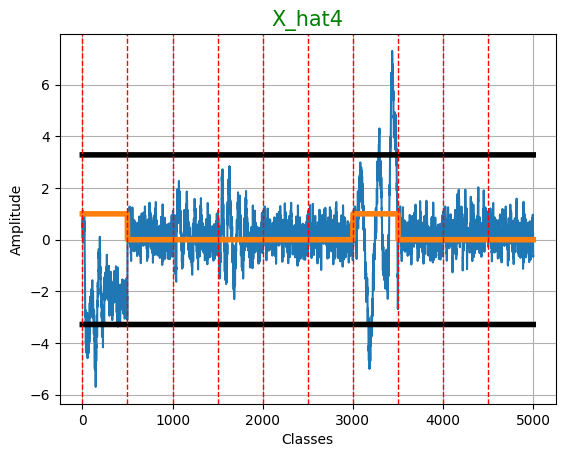

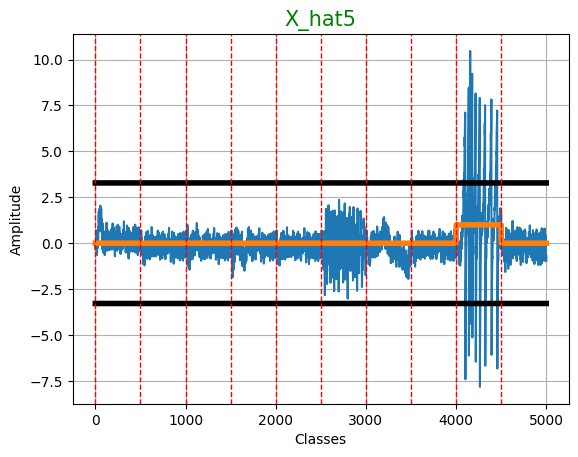

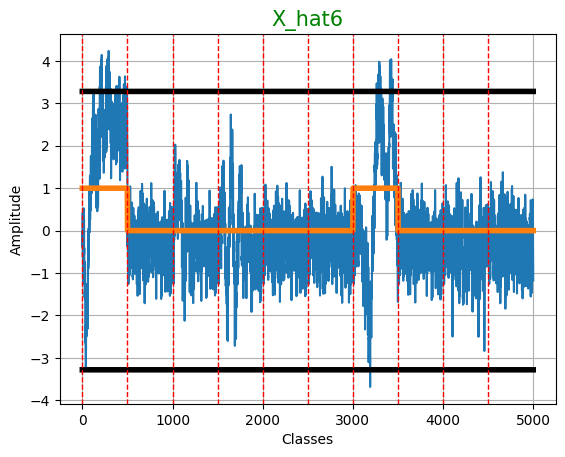

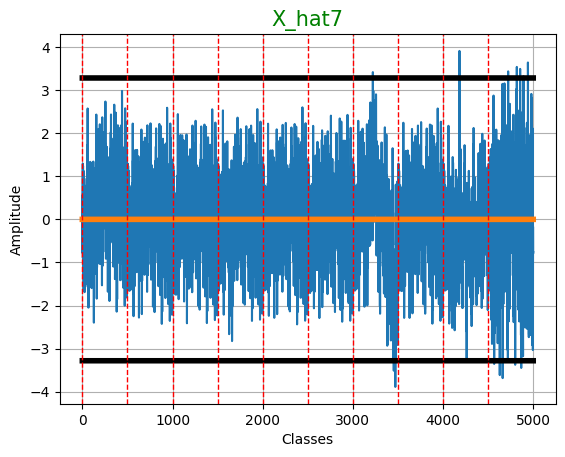

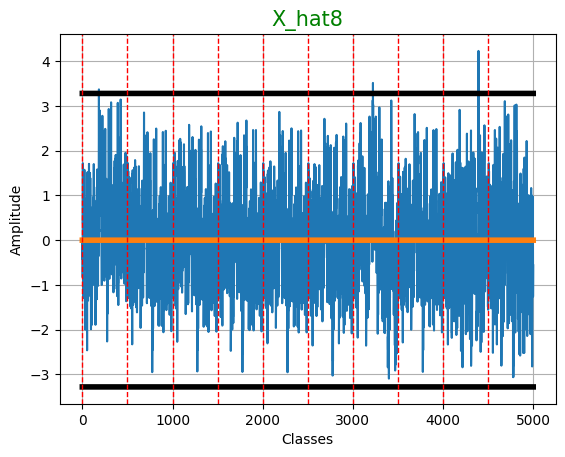

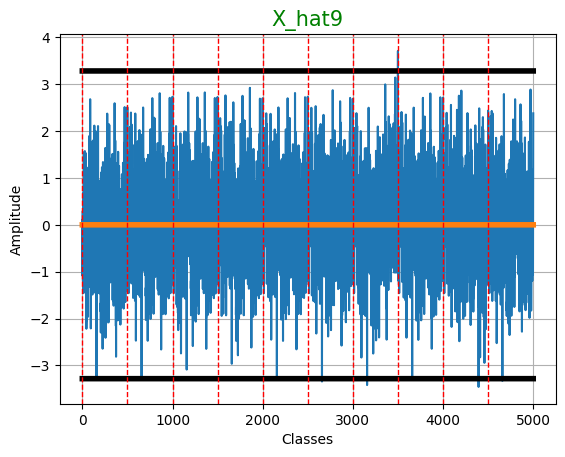

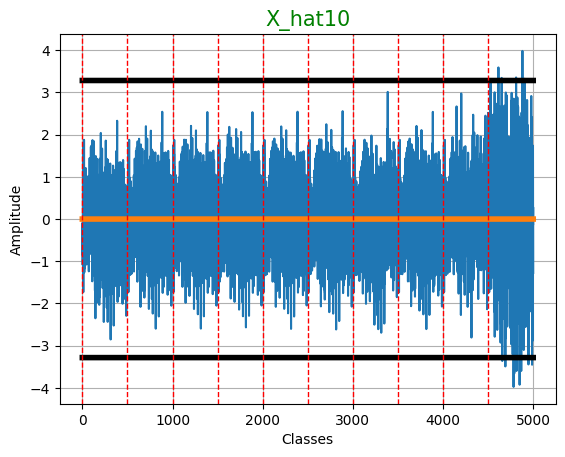

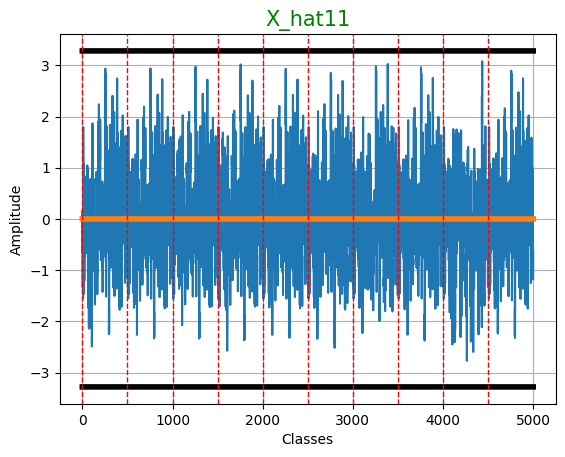

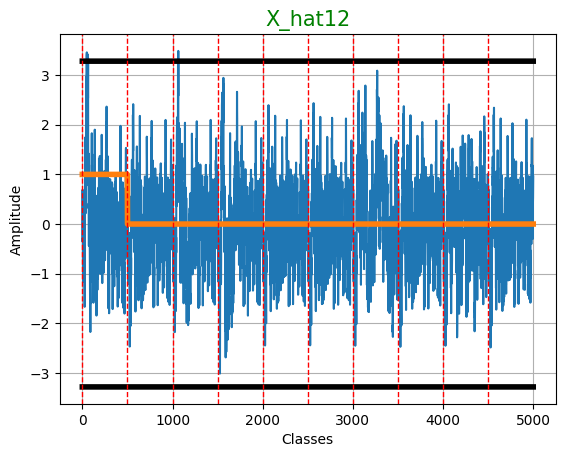

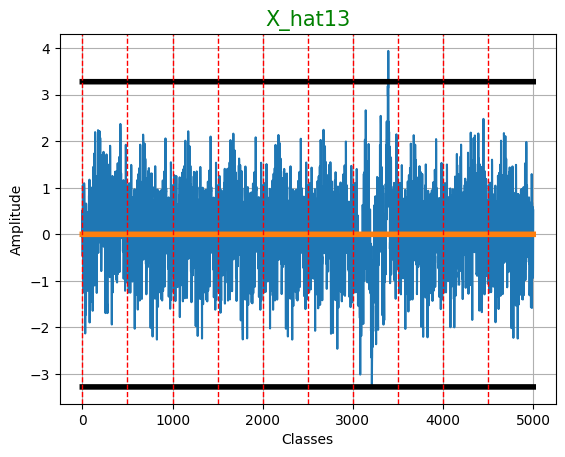

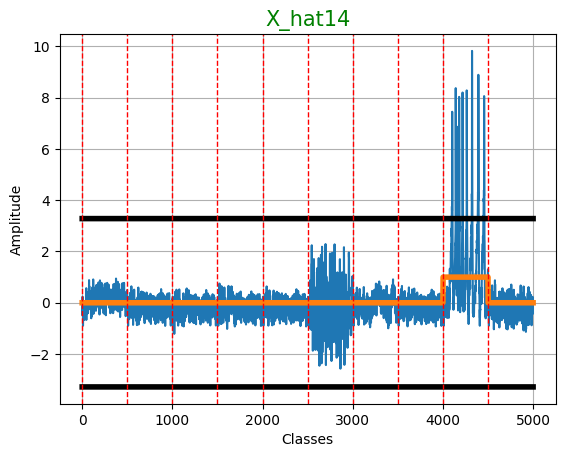

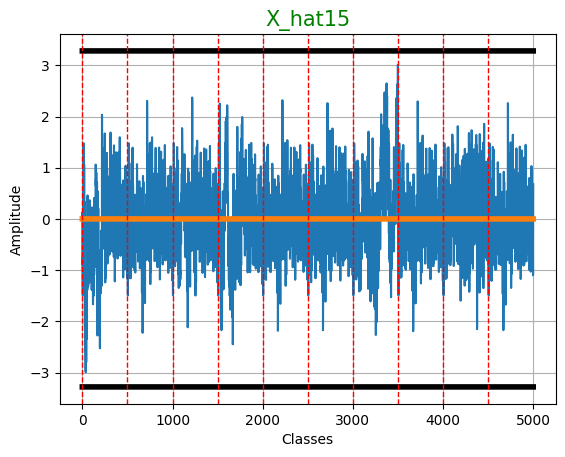

In [ ]:
	"""
	Plotting new Varibales through Classes for 15 and Fault Detecting with Std and Mean
	"""
	jj=0
Lable=np.zeros((5000,15))
	for i in range(len(Xt[0,:])):
	    plt.figure()
	    plt.plot(Xt[:,i])
	    plt.plot(T*np.ones(5000),color='black', linewidth='4')
	    plt.plot(-T*np.ones(5000),color='black',linewidth='4')
	    for k in range(0,5000,1):
	        if ((Xt[k,i]))>T or (Xt[k,i])<-T:
	            jj=jj+1
	        if jj>50:
	                Lable[(k//500)*500:((k//500)+1)*500,i]=1
	                jj=0
	    plt.plot(np.arange(0,5000,1),Lable[:,i], linewidth='4')
	    for j in range(0,5000,500):
	        plt.axvline(x =j, ymin=0, ymax=1000, linewidth = 1, linestyle ="--", color ='red')
	    plt.xlabel('Classes')
	    plt.ylabel('Amplitude')
	    plt.grid()
	    font1 = {'color':'g','size':15}
	    plt.title("X_hat{}".format(i+1),fontdict = font1)
	plt.show()


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
pca = PCA(0.9)
#Fit PCA on the training set
pca.fit(tr_s)
our_faulty_classes_lbl= Faulty_train[(Faulty_train.faultNumber==1)|
                                 (Faulty_train.faultNumber==3 )|
                                 (Faulty_train.faultNumber==5 )|
                                 (Faulty_train.faultNumber==7 )|
                                 (Faulty_train.faultNumber==9 )|
                                 (Faulty_train.faultNumber==11 )|
                                 (Faulty_train.faultNumber==13)|
                                 (Faulty_train.faultNumber==15 )|
                                 (Faulty_train.faultNumber==17)|
                                 (Faulty_train.faultNumber==19)].iloc[:,1]

#APPLY THE MAPPING (TRANSFORM) TO THE TRAINING SET AND THE TEST SET.
train_FF = pca.transform(tr_s)
test_F = pca.transform(tr_s_T)
train_F=scaler.fit_transform(train_FF)
#APPLY LOGISTIC REGRESSION TO THE TRANSFORMED DATA
# all parameters not specified are set to their defaults
# default solver is incredibly slow which is why it was changed to 'lbfgs'

#Make an instance of the model.
logisticRegr = LogisticRegression(solver = 'lbfgs')

#Train the model on the data, storing the information learned from the data.
#Model=logisticRegr.fit(train_F, our_faulty_classes_lbl)
#Model=sm.Logit(our_faulty_classes_lbl, train_F)
a = pca.n_components_
print('The number of Components by 90% of Varince Matrix',a)
#print(pca.components_)
#plt.plot(pca.components_)
# Attribute of the Target Classes
print('Model Clases:',Model.classes_)
#get the value of the slope 𝑏₁ and the intercept 𝑏₀ of the linear function 𝑓 like so
print('Model Int',Model.intercept_)
#print('Model Coeff:',Model.coef_)

The number of Components by 90% of Varince Matrix 15
Model Clases: [ 1  3  5  7  9 11 13 15 17 19]
Model Int [-1.9894671   0.51223095  0.0847525   0.1427533   0.13831494  0.20426651
  0.25012833  0.20601159  0.25193232  0.19907666]


In [ ]:
(result.predict(tran_F) >= 0.5).astype(int)

In [ ]:
Model.predict(train_F).shape


In [ ]:
Model.score(train_F,our_faulty_classes_lbl )

0.3498

In [ ]:
confusion_matrix(our_faulty_classes_lbl, Model.predict(train_F))

array([[472,   8,   1,   5,   9,   0,   3,   1,   0,   1],
       [  0, 170, 113,  75,  42,   4,  37,   7,   3,  49],
       [  3, 104, 137,  91,  49,   1,  71,  11,   3,  30],
       [  5,  96,  93, 121,  49,   0,  86,  11,  12,  27],
       [  0, 126, 136,  96,  55,   3,  32,   6,   2,  44],
       [  1,  92, 145,  76,  51,   6,  33,   6,  62,  28],
       [  2,  52,  26, 111,   7,   1, 290,   2,   4,   5],
       [  0, 125, 136,  93,  53,   4,  31,  11,   1,  46],
       [  0,  32,   7,  17,   5,   0,  15,   2, 416,   6],
       [  0, 131, 133,  83,  40,   1,  30,   8,   3,  71]])

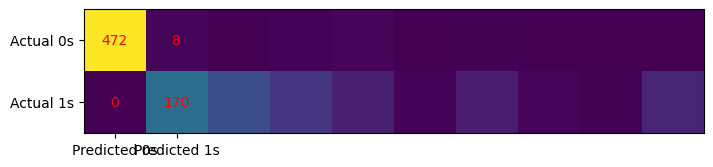

In [ ]:
cm = confusion_matrix(our_faulty_classes_lbl, Model.predict(train_F))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

In [ ]:
print(classification_report(our_faulty_classes_lbl, Model.predict(train_F)))

              precision    recall  f1-score   support

           1       0.94      0.94      0.94       500
           3       0.17      0.24      0.20       500
           5       0.15      0.39      0.22       500
           7       0.15      0.26      0.19       500
           9       0.16      0.10      0.12       500
          11       0.00      0.00      0.00       500
          13       0.46      0.49      0.47       500
          15       0.12      0.01      0.01       500
          17       0.67      0.83      0.74       500
          19       0.28      0.11      0.16       500

    accuracy                           0.34      5000
   macro avg       0.31      0.34      0.31      5000
weighted avg       0.31      0.34      0.31      5000



### Predict the labels of new data

In [ ]:
#This part uses the information the model learned during the model training process. The code below predicts for one observation.
logisticRegr.predict(test_F[:,1])


In [ ]:
# Predict for One Observation
logisticRegr.predict(tr_s_T[0:10])